# Management and Analysis of Physics Dataset - mod. B

### Davide Maniscalco*
     *PART A, PARTB, PART E: question2, question3 reviewed from previous notebook by Maniscalco, Pompeo.
# Session I

## PART A 

Login to CloudVeneto and access the machine found at the IP address 10.67.22.15:

`ssh dmanisca@gate.cloudveneto.it`

`ssh root@10.67.22.15`

Redis installation: 

`cd /tmp/
wget http://download.redis.io/releases/redis-5.0.7.tar.gz
tar -xvzf redis-5.0.7.tar.gz
cd redis-5.0.7
make
cd src/`

Export path and redis launch:

`export PATH=/redis-5.0.5/src:$PATH
redis-cli`

## PART B

Exercises link:
https://apeters.web.cern.ch/apeters/csc2018/CloudStorage.html

In below brief summary of the commands used for each exercise.

* **Creation of a 1kb file**

`dd if=/dev/zero of=1kB bs=1kB count=1`

* **Upload**

`for((i=0; i<100; i++)); do up_name=`\``uuidgen`\``;
cloud_upload 1kB $up_name;
done`

* **3.1.1**
 
 `source cloud.sh
 sha1string /etc/passwd` 
 
 [OUTPUT] 63ce9c1433c0fad87dcc9d5d22081acc7ff60df4
 
 ***
 
* **3.1.2**

 The function `hd8(x)` converts a hexadecimal character (0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f) to decimal, it divides by 2 and adds 1.
 
 ***
 
* **3.1.3**

 To assign a variable,
 
 `hash=` \``sha1string/etc/passwd`\`
 
 and to retrieve the variable content we do
 
 `echo $hash`
 
 [OUTPUT] 63ce9c1433c0fad87dcc9d5d22081acc7ff60df4
 
 ***
 
* **3.1.4**

 To select portion of a variable, 
 
 `hashkey=${hash:0:1}`
 
 `echo $hashkey`
 
 [OUTPUT] 6
 
 ***
 
* **3.1.5**

 To get the hashvalue of the previously defined `hashkey`
 
 `h8d $hashkey`
  
 [OUTPUT] 4
 
 ***
 
* **3.1.6**

 To upload a file according to its hashvalue (the functions are provided)
 
 `filename="/etc/resolv.conf"`
 
 `hash=` \``sha1string $filename`\` -- value: 4db35be416b06a118c9e1bd8943bda98a76b59b1
 
 `hashkey=${hash:0:1}` -- value: 4

 `index=`\``h8d $hashkey`\` -- value: 3
 
 `upload $filename $index $filename`
 
 [OUTPUT] OK

 ***

* **3.1.7**

 To instead download the file
 
 `download $index $filename ~/resolv.conf.downloaded`

 ***
 
* **3.1.8**

 To list all files on the server where they have been uploaded
 
 `list $index`

 [OUTPUT] /etc/resolv.conf 

 ***

* **3.1.9**

 To delete a file
 
 `delete $index $filename`
 
 ***
 
* **3.1.10**

 See link above
 
 ***
 
* **3.1.11**

 See link above
 
 ***
 
* **3.1.12**

 To count the number of files in each server

 `for name in 1 2 3 4 5 6 7 8; do list $name | wc -l; done`
 
 [OUTPUT] 11 11 13 17 10 9 11 18
 
 ***

* **3.1.13**

 See link above

 ***

* **3.1.14**

 For the function implementation, see link above. Then, for the time measurements, we do

 `cloud_ls | wc -l`

 [OUTPUT] 100

 `time cloud_ls`

 [OUTPUT] list of all files

         real    0m0.050s
         user    0m0.028s
         sys     0m0.031s
 

## PART C

We want to study the time performance of `cloud_ls` as a function of the number of items it has to go through. Six different numbers of uploaded files are taken into account: for each one of these the performance of the `cloud_ls` function is measured 300 times, number that allows both a sufficient statistic and a quick execution time (order of minutes, and not hours).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import statsmodels.api as sm
import matplotlib.gridspec as gridspec
#%matplotlib inline

#loading data
d100 = np.genfromtxt('./dati1/100.txt')
d500 = np.genfromtxt('./dati1/500.txt')
d5000 = np.genfromtxt('./dati1/5000.txt') 
d1000 = np.genfromtxt('./dati1/1000.txt')
d10000 = np.genfromtxt('./dati1/10000.txt')
d100000 = np.genfromtxt('./dati1/100000.txt')
n_files = np.array([100,500,1000,5000,10000,100000])

# mean values
means = np.zeros([6])
means[0] = np.mean(d100)
means[1] = np.mean(d500)
means[2] = np.mean(d1000)
means[3] = np.mean(d5000)
means[4] = np.mean(d10000)
means[5] = np.mean(d100000)
print('Mean values (s): ', means)

Mean values (s):  [0.03984667 0.04432333 0.04723    0.07782    0.11912    0.93356667]


In below are plotted normalized histograms of the 300 misurations for each amount of uploaded files and, for comparison, the gaussian distributions built using means and standard deviations of the data.

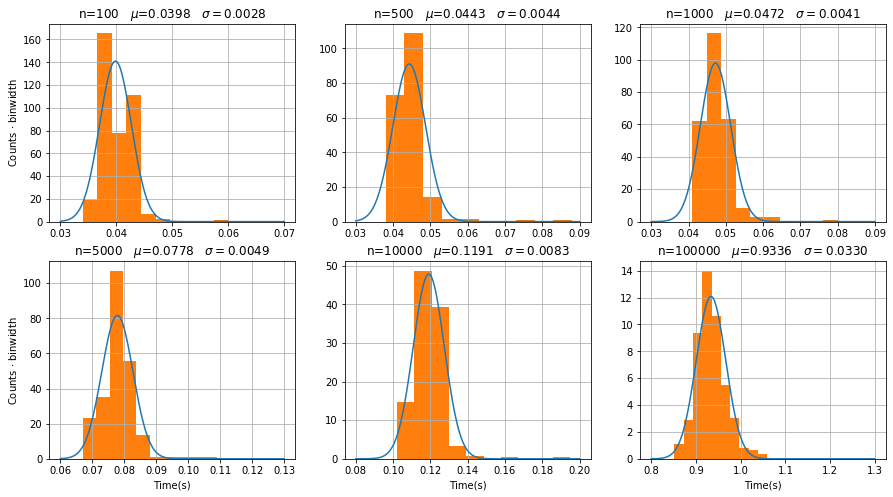

In [161]:
# histograms
fig, axs = plt.subplots(2, 3, figsize=(15,8))

# 100
xx = np.linspace(0.03,0.07,1000)
(mu, sigma) = norm.fit(d100)
axs[0,0].plot(xx, norm.pdf(xx,mu,sigma))
axs[0,0].hist(d100, density=True)
axs[0,0].grid()
axs[0,0].set_title('n=100  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[0,0].set_ylabel('Counts $\cdot$ binwidth')

# 500
xx = np.linspace(0.03,0.09,1000)
(mu, sigma) = norm.fit(d500)
axs[0,1].plot(xx, norm.pdf(xx,mu,sigma))
axs[0,1].hist(d500, density=True)
axs[0,1].grid()
axs[0,1].set_title('n=500  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))

# 1000
xx = np.linspace(0.03,0.09,1000)
(mu, sigma) = norm.fit(d1000)
axs[0,2].plot(xx, norm.pdf(xx,mu,sigma))
axs[0,2].hist(d1000, density=True)
axs[0,2].grid()
axs[0,2].set_title('n=1000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))

# 5000
xx = np.linspace(0.06,0.13,1000)
(mu, sigma) = norm.fit(d5000)
axs[1,0].plot(xx, norm.pdf(xx,mu,sigma))
axs[1,0].hist(d5000, density=True)
axs[1,0].grid()
axs[1,0].set_title('n=5000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,0].set_ylabel('Counts $\cdot$ binwidth')
axs[1,0].set_xlabel('Time(s)')

# 10000
xx = np.linspace(0.08,0.2,1000)
(mu, sigma) = norm.fit(d10000)
axs[1,1].plot(xx, norm.pdf(xx,mu,sigma))
axs[1,1].hist(d10000, density=True)
axs[1,1].grid()
axs[1,1].set_title('n=10000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,1].set_xlabel('Time(s)')

# 100000
xx = np.linspace(0.8,1.3,1000)
(mu, sigma) = norm.fit(d100000)
axs[1,2].plot(xx, norm.pdf(xx,mu,sigma))
axs[1,2].hist(d100000, density=True)
axs[1,2].grid()
axs[1,2].set_title('n=100000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,2].set_xlabel('Time(s)')

plt.show()

It has been retained resonable to use the mean value as an estimator for the `cloud_ls` time. In below it is made the linear regression of these mean values as a function of the number of uploaded files.

Fit excluding the 1-million point 

m = 8.9675e-06 +- 5.08e-08
q = 0.036 +- 0.002
R^2 = 0.99987141358968


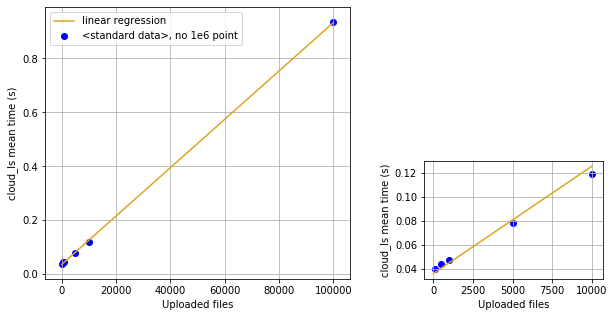

In [173]:
# regression
endog = means
exog = n_files
exog = sm.add_constant(exog)
mod = sm.OLS(endog, exog)
res = mod.fit()
m = res.params[1]
q = res.params[0]

# plot
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m + q, c='goldenrod', label='linear regression')
plt.scatter(n_files,means, color='blue', label='<standard data>, no 1e6 point')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.legend()
plt.grid()

xx = np.linspace(0, 10000, 1000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m + q, c='goldenrod')
plt.scatter(n_files[:-1],means[:-1], color='blue')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()

#results
print("Fit excluding the 1-million point \n")
print('m = %0.4e'%(m)+' +- %1.2e'%(res.bse[1]))
print('q = %0.3f'%(q)+' +- %1.3f'%(res.bse[0]))
print('R^2 = '+str(res.rsquared))
#print(res.summary())

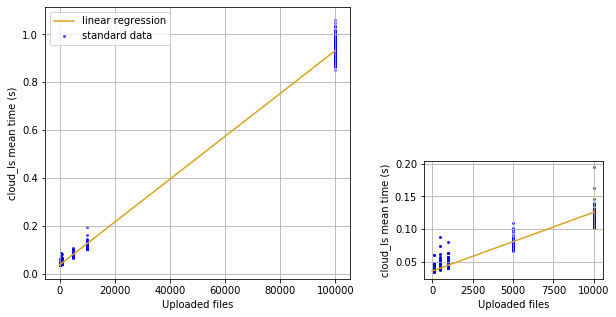

In [184]:
# plot with all the data, no one million
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m + q, c='goldenrod', label='linear regression')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100)):
    plt.scatter(100,d100[i],color='blue',alpha=1,s=4)
    plt.scatter(500,d500[i],color='blue',alpha=.9,s=4)
    plt.scatter(1000,d1000[i],color='blue',alpha=.8,s=4)
    plt.scatter(5000,d5000[i],color='blue',alpha=.7,s=4)
    plt.scatter(10000,d10000[i],color='blue',alpha=.6,s=4)
    plt.scatter(100000,d100000[i],color='blue',alpha=.5,s=4)
plt.scatter(10000,d10000[0],color='blue',alpha=.6,s=4,label='standard data')
plt.legend()

xx = np.linspace(0, 10000, 1000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m + q, c='goldenrod')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100)):
    plt.scatter(100,d100[i],color='blue',alpha=1,s=4)
    plt.scatter(500,d500[i],color='blue',alpha=.9,s=4)
    plt.scatter(1000,d1000[i],color='blue',alpha=.8,s=4)
    plt.scatter(5000,d5000[i],color='blue',alpha=.7,s=4)
    plt.scatter(10000,d10000[i],color='blue',alpha=.6,s=4)
plt.scatter(10000,d10000[0],color='blue',alpha=.6,s=4)
plt.show()

As it can be seen, a linear regression seems to well fit the data. Unfortunately, the intercept miss the zero, having the first non zero number at the second digit after the comma. This may be due to a little delay present in every time misuration.

## PART D

### Part C with the one-million data

The previous procedure is repeated: 300 measures of the `cloud_ls` function are performed. Again the normalized histogram of the misurations is shown with the gaussian distribution; a new linear regression is performed using all the points.

In [4]:
d1000000 = np.genfromtxt('./dati1/1000000.txt')
n_files_mill = np.append(n_files,1000000)
means_mill = np.append(means,np.mean(d1000000))
print('All the mean values: ',means_mill)

All the mean values:  [0.03984667 0.04432333 0.04723    0.07782    0.11912    0.93356667
 8.87814667]


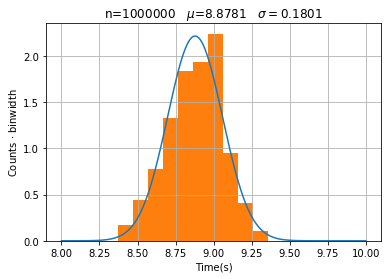

In [124]:
# hisogram 100000
xx = np.linspace(8,10,1000)
(mu, sigma) = norm.fit(d1000000)
plt.plot(xx, norm.pdf(xx,mu,sigma))
plt.hist(d1000000, density=True)
plt.grid()
plt.title('n=1000000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
plt.xlabel('Time(s)')
plt.ylabel('Counts $\cdot$ binwidth')

plt.show()

Fit with all the points 

m = 8.8408e-06 +- 7.08e-09
q = 0.038 +- 0.003
R^2 = 0.9999967927346982


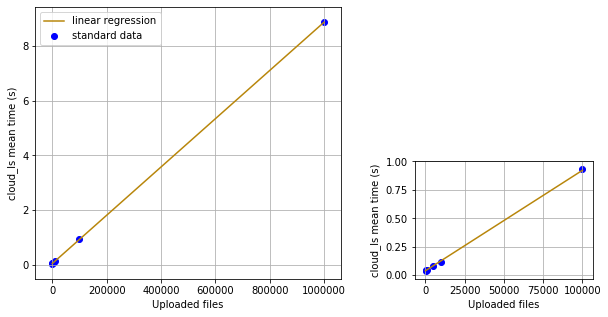

In [156]:
# regression
endog_m = means_mill
exog_m = n_files_mill
exog_m = sm.add_constant(exog_m)
mod_m = sm.OLS(endog_m, exog_m)
res_m = mod_m.fit()
m_m = res_m.params[1]
q_m = res_m.params[0]

# plot
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 1000000, 100000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m_m + q_m, c='darkgoldenrod', label='linear regression')
plt.scatter(n_files_mill,means_mill, color='blue', label='<standard data>')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.legend()
plt.grid()

xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m_m + q_m, c='darkgoldenrod')
plt.scatter(n_files_mill[:-1],means_mill[:-1], color='blue')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()

#results
print("Fit with all the points \n")
print('m = %0.4e'%(m_m)+' +- %1.2e'%(res_m.bse[1]))
print('q = %0.3f'%(q_m)+' +- %1.3f'%(res_m.bse[0]))
print('R^2 = '+str(res_m.rsquared))
#print(res.summary())

The data seem to be well fitted again with a linear regression. 

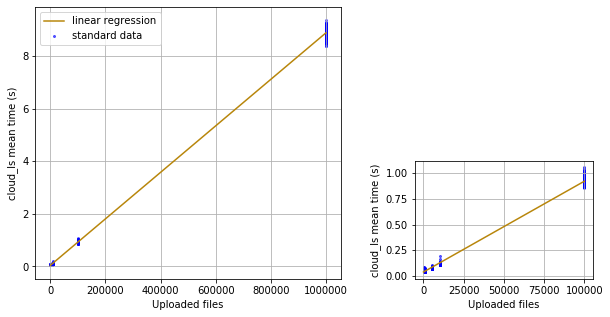

In [186]:
# plot with all the data, no one million
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 1000000, 100000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m_m + q_m, c='darkgoldenrod', label='linear regression')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100)):
    plt.scatter(100,d100[i],color='blue',alpha=1,s=4)
    plt.scatter(500,d500[i],color='blue',alpha=.9,s=4)
    plt.scatter(1000,d1000[i],color='blue',alpha=.8,s=4)
    plt.scatter(5000,d5000[i],color='blue',alpha=.7,s=4)
    plt.scatter(10000,d10000[i],color='blue',alpha=.6,s=4)
    plt.scatter(100000,d100000[i],color='blue',alpha=.5,s=4)
    plt.scatter(1000000,d1000000[i],color='blue',alpha=.5,s=4)
plt.scatter(10000,d10000[0],color='blue',alpha=.6,s=4,label='standard data')
plt.legend()

xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m_m + q_m, c='darkgoldenrod')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100)):
    plt.scatter(100,d100[i],color='blue',alpha=1,s=4)
    plt.scatter(500,d500[i],color='blue',alpha=.9,s=4)
    plt.scatter(1000,d1000[i],color='blue',alpha=.8,s=4)
    plt.scatter(5000,d5000[i],color='blue',alpha=.7,s=4)
    plt.scatter(10000,d10000[i],color='blue',alpha=.6,s=4)
    plt.scatter(100000,d100000[i],color='blue',alpha=.5,s=4)
plt.scatter(10000,d10000[0],color='blue',alpha=.6,s=4)
plt.show()

### Upload time analysis

The time it takes for the upload of every single file is stored in a file through the command:

`for((i=0; i<1000000; i++)); do up_name=` \``uuidgen`\` `; (time cloud_upload 1kB $up_name) 2>> up_time.csv; done`.

In [7]:
million = np.genfromtxt('./dati1/million.txt')

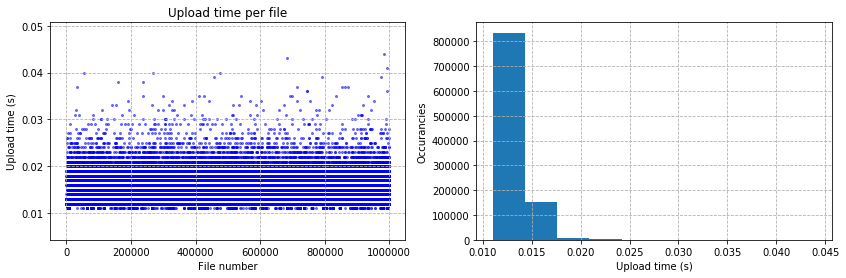

In [192]:
fig, axs = plt.subplots(1,2, figsize=(14,4))

xx = np.arange(1, 1000001)
axs[0].scatter(xx, million, color='blue', s=4, alpha=0.5)
axs[0].grid(ls="--")
axs[0].set_xlabel("File number")
axs[0].set_ylabel("Upload time (s)")
axs[0].set_title("Upload time per file")

axs[1].hist(million)
axs[1].grid(ls='--')
axs[1].set_ylabel("Occurancies")
axs[1].set_xlabel("Upload time (s)")
plt.show()

In [195]:
print('Fraction of measurements below 0.02s: ',np.mean(million<0.02))
print('Number of mesurements with the minimal value: ',np.sum(million==np.min(million)))

Fraction of measurements below 0.02s:  0.995783
Number of mesurements with the minimal value:  1453


As it can be seen, the upload time for a single time doesn't seem to vary in time. Almost all the data are concentrated in the small interval [0.01, 0.02]. Some unpredictable delays affect some of the measurements. Moreover, it is interesting to notice that the minimal value is not achieved by a single random outlier, but seems to be like a threshold. 

## PART E

#### Question 1: How do you think the measurements in PART C and PART D would be affected if you use a bucket? You can try it or give a theoretical answer based on what you learned. Both are valid options.


This question in analyzed taking measurements hands-on. 

The file `cloudset.sh` is downloaded and `cloud.sh` is modified as described in the section 3.2 of the link in PART B. This updates the library so that files with bucket can be uploaded: so the database is reset and the PART C and PART D are repeated, measuring the performance of the new ls function:

`function cloud_ls_bucket() {
set_ls $ bucketindex $ bucketname | sort
}`

In [138]:
#loading data, bucket
d100b = np.genfromtxt('./dati1/b100.txt')
d500b = np.genfromtxt('./dati1/b500.txt')
d5000b = np.genfromtxt('./dati1/b5000.txt') 
d1000b = np.genfromtxt('./dati1/b1000.txt')
d10000b = np.genfromtxt('./dati1/b10000.txt')
d100000b = np.genfromtxt('./dati1/b100000.txt')
d1000000b = np.genfromtxt('./dati1/b1000000.txt')

# mean values (bucket)
means_b_mill = np.zeros([7])
means_b_mill[0] = np.mean(d100b)
means_b_mill[1] = np.mean(d500b)
means_b_mill[2] = np.mean(d1000b)
means_b_mill[3] = np.mean(d5000b)
means_b_mill[4] = np.mean(d10000b)
means_b_mill[5] = np.mean(d100000b)
means_b_mill[6] = np.mean(d1000000b)

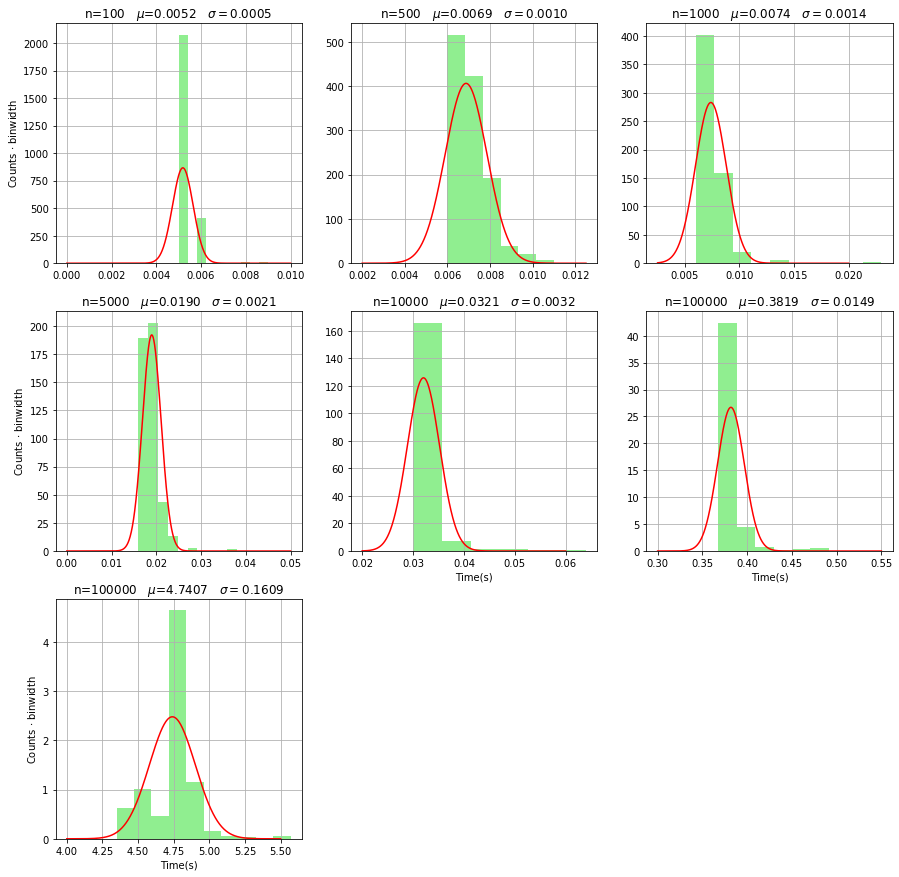

In [137]:
# histograms, data with bucket
fig, axs = plt.subplots(3, 3, figsize=(15,15))

# 100
xx = np.linspace(0.0,0.01,1000)
(mu, sigma) = norm.fit(d100b, nbins=3)
axs[0,0].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[0,0].hist(d100b, density=True, color='lightgreen')
axs[0,0].grid()
axs[0,0].set_title('n=100  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[0,0].set_ylabel('Counts $\cdot$ binwidth')

# 500
xx = np.linspace(0.002,0.0125,1000)
(mu, sigma) = norm.fit(d500b)
axs[0,1].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[0,1].hist(d500b, density=True, bins = 6, color='lightgreen')
axs[0,1].grid()
axs[0,1].set_title('n=500  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))

# 1000
xx = np.linspace(0.0025,0.02,1000)
(mu, sigma) = norm.fit(d1000b)
axs[0,2].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[0,2].hist(d1000b, density=True, color='lightgreen')
axs[0,2].grid()
axs[0,2].set_title('n=1000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))

# 5000
xx = np.linspace(0.0,0.05,1000)
(mu, sigma) = norm.fit(d5000b)
axs[1,0].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[1,0].hist(d5000b, density=True, color='lightgreen')
axs[1,0].grid()
axs[1,0].set_title('n=5000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,0].set_ylabel('Counts $\cdot$ binwidth')

# 10000
xx = np.linspace(0.02,0.06,1000)
(mu, sigma) = norm.fit(d10000b)
axs[1,1].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[1,1].hist(d10000b, density=True, bins=6, color='lightgreen')
axs[1,1].grid()
axs[1,1].set_title('n=10000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,1].set_xlabel('Time(s)')

# 100000
xx = np.linspace(0.3,0.55,1000)
(mu, sigma) = norm.fit(d100000b)
axs[1,2].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[1,2].hist(d100000b, density=True, bins=6, color='lightgreen')
axs[1,2].grid()
axs[1,2].set_title('n=100000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[1,2].set_xlabel('Time(s)')

# 1000000
xx = np.linspace(4,5.5,1000)
(mu, sigma) = norm.fit(d1000000b)
axs[2,0].plot(xx, norm.pdf(xx,mu,sigma), color='r')
axs[2,0].hist(d1000000b, density=True, color='lightgreen')
axs[2,0].grid()
axs[2,0].set_title('n=100000  ' + ' $\mu$=%1.4f'%(mu) + '   $\sigma=$%1.4f' %(sigma))
axs[2,0].set_ylabel('Counts $\cdot$ binwidth')
axs[2,0].set_xlabel('Time(s)')

fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])
plt.show()

Again, it has been retained resonable to use the mean value as an estimator. In below it is made the linear regression of these mean values as a function of the number of uploaded files.

Fit with all the points, with bucket 

m = 4.7486e-06 +- 4.19e-08
q = -0.016 +- 0.016
R^2 = 0.9996105017404849


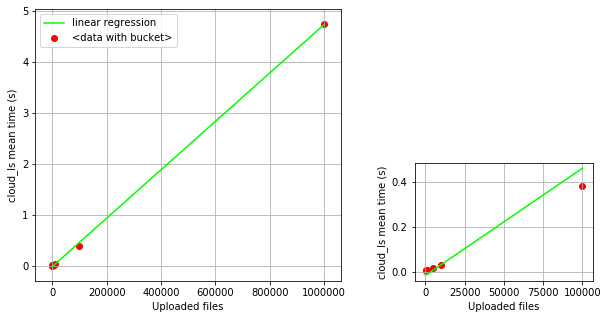

In [197]:
# regression
endog_b_m = means_b_mill
exog_b_m = n_files_mill
exog_b_m = sm.add_constant(exog_b_m)
mod_b_m = sm.OLS(endog_b_m, exog_b_m)
res_b_m = mod_b_m.fit()
m_b_m = res_b_m.params[1]
q_b_m = res_b_m.params[0]

# plot
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 1000000, 100000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m_b_m + q_b_m, c='lime', label='linear regression')
plt.scatter(n_files_mill,means_b_mill, color='r', label='<data with bucket>')
plt.xlabel('Uploaded files')
plt.ylabel('Time (s)')
plt.legend()
plt.grid()

xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m_b_m + q_b_m, c='lime')
plt.scatter(n_files_mill[:-1],means_b_mill[:-1], color='r')
plt.xlabel('Uploaded files')
plt.ylabel('Time (s)')
plt.grid()

#results
print("Fit with all the points, with bucket \n")
print('m = %0.4e'%(m_b_m)+' +- %1.2e'%(res_b_m.bse[1]))
print('q = %0.3f'%(q_b_m)+' +- %1.3f'%(res_b_m.bse[0]))
print('R^2 = '+str(res_b_m.rsquared))
#print(res.summary())

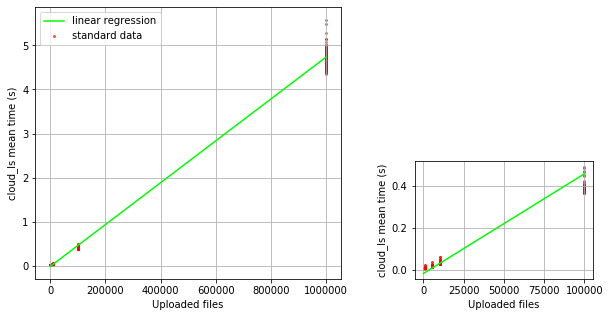

In [198]:
# plot with all the data, no one million
fig = plt.figure(1, figsize = (10,5))
gridspec.GridSpec(9,9)
xx = np.linspace(0, 1000000, 100000)
plt.subplot2grid((9,9), (0,0), colspan=5, rowspan=9)
plt.plot(xx, xx*m_b_m + q_b_m, c='lime', label='linear regression')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100)):
    plt.scatter(100,d100b[i],color='r',alpha=1,s=4)
    plt.scatter(500,d500b[i],color='r',alpha=.9,s=4)
    plt.scatter(1000,d1000b[i],color='r',alpha=.8,s=4)
    plt.scatter(5000,d5000b[i],color='r',alpha=.7,s=4)
    plt.scatter(10000,d10000b[i],color='r',alpha=.6,s=4)
    plt.scatter(100000,d100000b[i],color='r',alpha=.5,s=4)
    plt.scatter(1000000,d1000000b[i],color='r',alpha=.5,s=4)
plt.scatter(10000,d10000b[0],color='r',alpha=.6,s=4,label='standard data')
plt.legend()

xx = np.linspace(0, 100000, 10000)
plt.subplot2grid((9,9), (5,6), colspan=3, rowspan=4)
plt.plot(xx, xx*m_b_m + q_b_m, c='lime')
plt.xlabel('Uploaded files')
plt.ylabel('cloud_ls mean time (s)')
plt.grid()
for i in range(len(d100b)):
    plt.scatter(100,d100b[i],color='r',alpha=1,s=4)
    plt.scatter(500,d500b[i],color='r',alpha=.9,s=4)
    plt.scatter(1000,d1000b[i],color='r',alpha=.8,s=4)
    plt.scatter(5000,d5000b[i],color='r',alpha=.7,s=4)
    plt.scatter(10000,d10000b[i],color='r',alpha=.6,s=4)
    plt.scatter(100000,d100000b[i],color='r',alpha=.5,s=4)
plt.scatter(10000,d10000b[0],color='r',alpha=.6,s=4)
plt.show()

Ratio between angular coefficients, with/without bucket:  1.8617626882767564


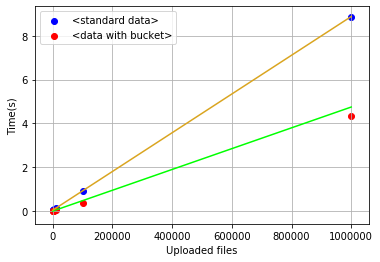

In [199]:
plt.scatter(n_files_mill, means_mill, label='<standard data>', color='blue')
plt.scatter(n_files_mill, min_b_mill, label='<data with bucket>', color='red')
xx = np.linspace(0, 1000000, 100000)
plt.plot(xx, xx*m_b_m, q_b_m, c='lime')
plt.plot(xx, xx*m_m + q_m, c='goldenrod')
plt.legend()
plt.xlabel('Uploaded files')
plt.ylabel('Time(s)')
plt.grid()
print('Ratio between angular coefficients, with/without bucket: ',m_m/m_b_m)

Here are confrontation between the bucket and the without bucket case is made. The ratio between the angular coefficients is about 1.86: the bucket make the ls operation almost two times faster.

### Upload time analysis, with bucket

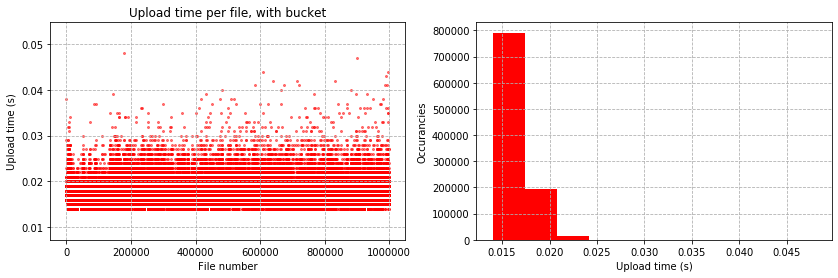

In [219]:
bmillion = np.genfromtxt('./dati1/bmillion.txt')
fig, axs = plt.subplots(1,2, figsize=(14,4))

xx = np.arange(1, 1000001)
axs[0].scatter(xx, bmillion, color='r', s=4, alpha=0.5)
axs[0].grid(ls="--")
axs[0].set_xlabel("File number")
axs[0].set_ylabel("Upload time (s)")
axs[0].set_title("Upload time per file, with bucket")

axs[1].hist(bmillion, color='r')
axs[1].grid(ls='--')
axs[1].set_ylabel("Occurancies")
axs[1].set_xlabel("Upload time (s)")
plt.show()

In [218]:
print('Fraction of measurements below 0.03s: ',np.mean(bmillion<0.03))
print('Minimum measurement (s): ',np.min(bmillion))
print('Number of mesurements with the minimal value: ',np.sum(bmillion==np.min(bmillion)))

Fraction of measurements below 0.03s:  0.999779
Minimum measurement (s):  0.014
Number of mesurements with the minimal value:  8097


The behaviour of the upload time for single files with bucket is similar to the one seen before for the files without. As it can be seen, the upload time for a single time doesn't seem to vary in time. Almost all the data are concentrated in the small interval [0.014, 0.03]. Some unpredictable delays affect some of the measurements. Moreover, it is interesting to notice that the minimal value is not achieved by a single random outlier, but seems to be like a threshold.  

In the end, a graphical comparison between upload times of data with and without bucket is made.

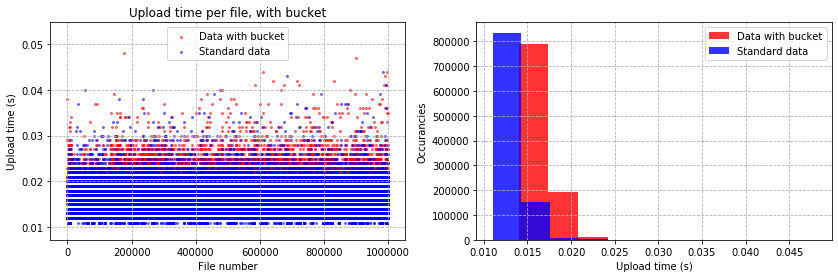

In [220]:
bmillion = np.genfromtxt('bmillion.txt')
fig, axs = plt.subplots(1,2, figsize=(14,4))

xx = np.arange(1, 1000001)
axs[0].scatter(xx, bmillion, color='r', s=4, alpha=0.5, label='Data with bucket')
axs[0].scatter(xx, million, color='b', s=4, alpha=0.5, label='Standard data')
axs[0].grid(ls="--")
axs[0].set_xlabel("File number")
axs[0].set_ylabel("Upload time (s)")
axs[0].set_title("Upload time per file, with bucket")
axs[0].legend()

axs[1].hist(bmillion, color='r',alpha=0.8, label='Data with bucket')
axs[1].hist(million, color='b', alpha=0.8, label='Standard data')
axs[1].grid(ls='--')
axs[1].set_ylabel("Occurancies")
axs[1].set_xlabel("Upload time (s)")
axs[1].legend()
plt.show()

In [67]:
print('Mean upload time, normal data (s): ', np.mean(million))
print('Total upload time, normal data (h): ', np.sum(million)/3600,'\n')
print('Mean upload time, data with bucket (s): ', np.mean(bmillion))
print('Total upload time, data with bucket (h): ', np.sum(bmillion)/3600,'\n')
print('Ratio: ',np.mean(bmillion)/np.mean(million))

Mean upload time, normal data (s):  0.013436840000000004
Total upload time, normal data (h):  3.7324555555555565 

Mean upload time, data with bucket (s):  0.01631607100000001
Total upload time, data with bucket (h):  4.532241944444446 

Ratio:  1.2142788780695464


Bucket is an additional metadata: because of its presence, the upload time of data with bucket is, on average, about 1.2 times bigger than the average upload time for the data without. For one million files, the difference in time is about 50 minutes.

#### Question 2:           Imagine you implement security and for each function you call you have an authentication overhead of 1 second. How do you think your measurements will be impacted? Again, you can try this directly (you can use the unix “sleep 1” command) or give a theoretical answer based on what you learned. What would you do to limit the impact of security overhead if you were the developer of REDIS?

The implementation of an authentication overhead of 1 second per operation for security purposes would have a dramatic impact on the time measurements performed previously. For example, when uploading files, the upload time was in the range of tens of milliseconds, which makes the time wasted in authentication way dominant; this would mean that when dealing with 100000 or 1 million files we would have to wait even more than a day just for the security implementations!

In our scenario, where we are working with a huge number of limited files, this authentication solution would then be absolutely inefficient. A possible alternative could be to make the authentication process more stringent (say, by means of a GUID) but only requesting it at access time or every some operations (e.g.: every 1,000 or 10,000 operations performed). It is also possible to request authentication at time intervals, forcing a session to ask for credentials for example every n minutes, in order to avoid unlimited access.

Otherwise, accountability could be implemented, so that we would be able to relax our security protocols while making all the users accountable for the actions they have performed, since they will end up in a log.

#### Question 3: The storage we deployed using REDIS is very simple, there is no redundancy. How would you modify your service and your client to reduce the probability of data loss?

In such a simple implementation of a REDIS server, redundancy was not taken into consideration, but in real life this could have huge implications: data loss constitutes a real threat without any strategy to effectively prevent it.

As far as the service is concerned, a way to implement redundancy is through the RAID (Redundant Array of Independent Disks) system. For our simple purposes, even RAID1 would probably be enough: the data is simply copied on two disks (disk mirroring) and if one particular piece of data is lost, then its copy on the other disk will prevent a definitive loss of information. More complex strategies, such as RAID5 or RAID6, also implement error detection and correction algorithms and can withstand the loss of one or two whole disks, respectively. This will also improve the availability of the data itself, so in case of a storage unit failure, information can still be retrieved.

From the client's perspective, instead, a possibility to prevent data loss could be to restrict only to a limited number of qualified users the possibility to delete files or to launch commands that can perform actions that cannot be undone.